# Simulation of Imaging Systematics

In this notebook, we demonstrate the simulation of systematic effects caused by imaging properties. 

## Idea
Given the window function $F$, the observed modulated galaxy count $n_{\rm truth}$ is,
$$
n_{\rm obs} = n_{\rm truth} F
			     = {\bar n} (1 + \delta_{\rm truth}) F 
$$                 
where $\delta_{\rm truth}$ is the ground truth density contrast, and ${\bar n}$ is the expected mean density. Since the mock data we are trying to contaminate are processed into a density field. In the following, we aim to find a formula that will introduce imaging systematics in the density contrast field. Therefore, the observed density contrast could be constructed as:
$$
\delta_{\rm obs}  = \frac{n_{\rm obs}}{<n_{\rm obs}>} - 1
$$
where angle brackets represent the ensemble average. By combining these two equations, and assuming,
\begin{align}
< \delta_{\rm truth} F > &= 0, \\
< \delta_{\rm truth} > &= 0, \\
< F > &= 1,  \\
\end{align}
we obtain:
$$
\delta_{\rm obs} = (\delta_{\rm truth} + 1)F - 1
$$
The first assumption implies that there is no correlation between the truth, systematic-free, mock density field and window function. The second assumption is already satisfied with the definition of density contrast, and the last assumption is guaranteed inside the pipeline, i.e., window function, which is the predicted number of galaxies, is normalized to have a mean of one.

## code

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np

import sys
sys.path.insert(0, '/home/mehdi/github/imaging-sys-covariance')
from src import GenSys

ModuleNotFoundError: No module named 'src'

In [3]:
#--- inputs 
# truth density contrast (no imag. systematics)
# mask (binary)
# window functions

p = '/home/mehdi/data/tanveer/'
delta_t = hp.read_map(f'{p}FA_EZmock_desi_ELG_v0_10_delta.hp256.fits') # truth density contrast
mask = np.isfinite(delta_t)                                            # read a binary mask in HEALPix
gs = GenSys(f'{p}elg_mse_snapshots/nn-weights-combined.fits')          # window functions

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
# of selection functions:  (302503, 125)


In [4]:
#--- contaminate a given density field
delta_c = gs.contaminate(0, delta_t, mask)

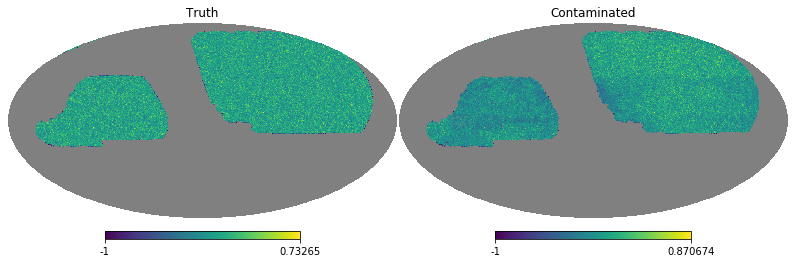

In [6]:
fg, ax = plt.subplots(ncols=2, figsize=(14, 4.5))
fg.subplots_adjust(wspace=0.0)

for i, (map_i, title_i) in enumerate(zip([delta_t, delta_c],
                                         ['Truth', 'Contaminated'])):
    plt.sca(ax[i])
    hp.mollview(map_i, rot=-85, hold=True, title=title_i)

The right panel shows the contaminated density field which reflects some depth and extinction related fluctuations over the footprint.